## Multiple Linear Regression

## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Data Preparation

In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


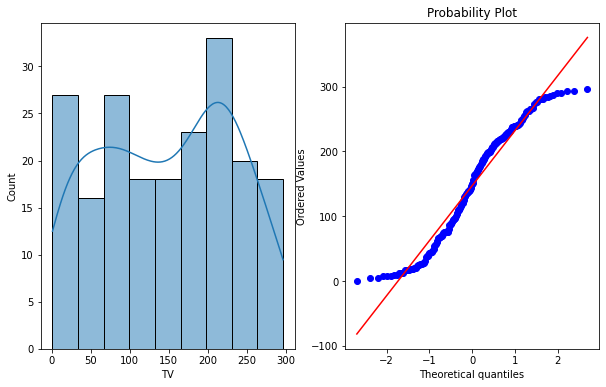

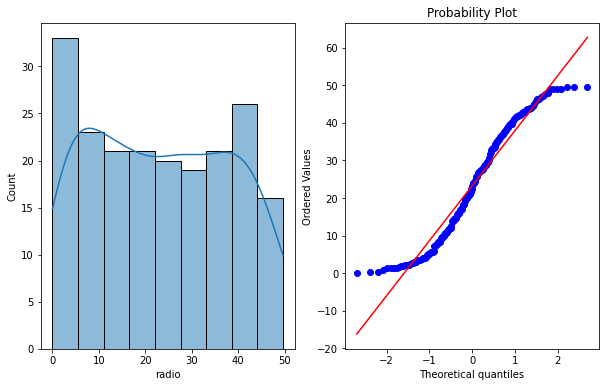

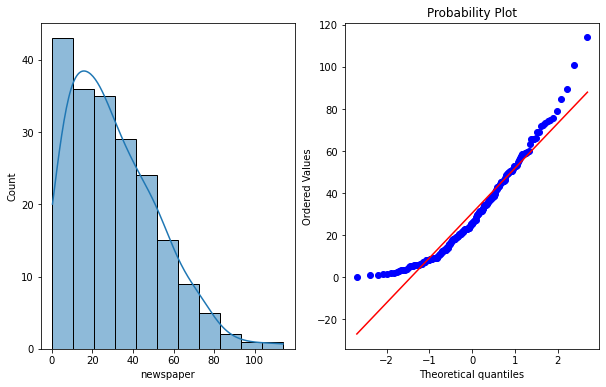

In [6]:
def check_dist(df, var):
    plt.subplot(1, 2, 1)
    sns.histplot(x=var, data=df,kde=True)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.show()
    
for col in df.drop("sales", axis=1).columns:
    check_dist(df, col)

In [7]:
from scipy.stats import skew
for i in df.drop('sales',axis=1).columns:
    print(i, skew(df[i]))

TV -0.06932836662244649
radio 0.0934668451108453
newspaper 0.8879959753085498


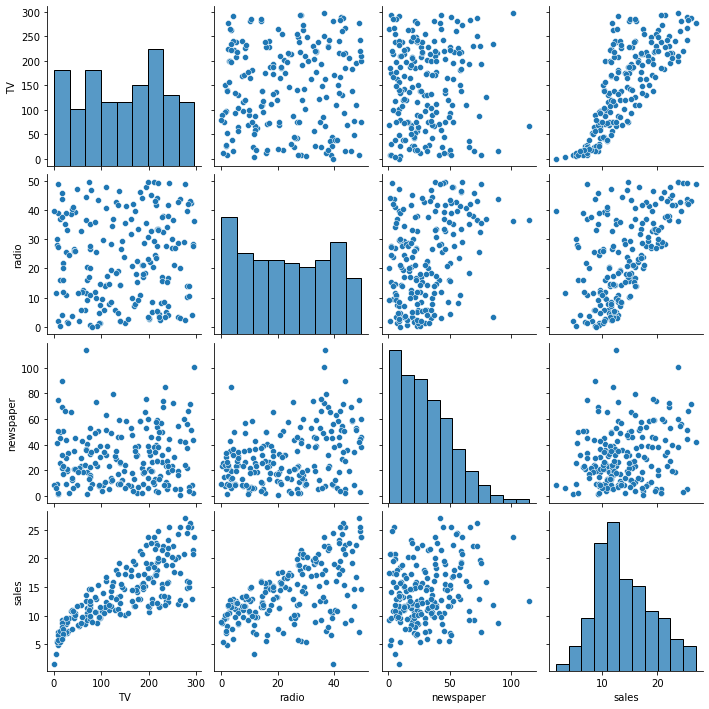

In [8]:
sns.pairplot(df);

In [9]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

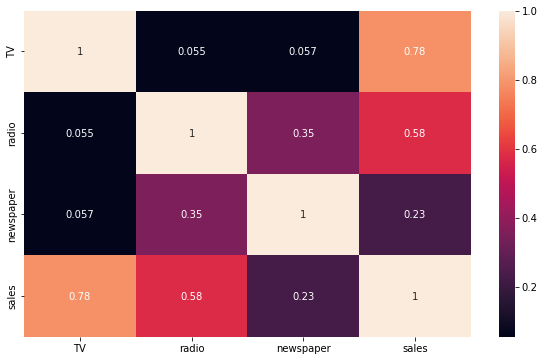

In [10]:
sns.heatmap(df.corr(),annot=True)

## Train-Test Split

In [11]:
# pip install scikit-learn

In [12]:
X = df.drop('sales',axis=1)
y = df['sales']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [15]:
X_train.shape,X_test.shape

((140, 3), (60, 3))

In [16]:
y_train.shape,y_test.shape

((140,), (60,))

## Model Fitting and Compare Actual and Predicted Labels

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [22]:
my_dict = {'actual': y_test, 'pred': y_pred,'residual': y_test-y_pred}

In [23]:
comparing = pd.DataFrame(my_dict)

In [24]:
comparing

,actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


<AxesSubplot:>

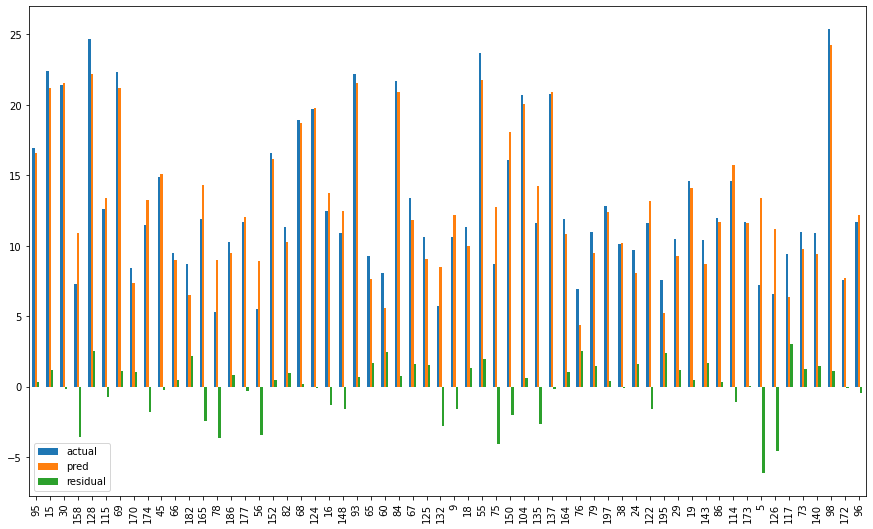

In [25]:
comparing.plot(kind = 'bar',figsize = (15,9))

## Error Metrics

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [27]:
R2_score = r2_score(y_test,y_pred)
R2_score
# Elimdeki veriler yüzde 86 oranında doğru tahmin yapıyor

0.8609466508230368

In [28]:
mae = mean_absolute_error(y_test,y_pred)
mae
# 

1.5116692224549089

In [29]:
mse = mean_squared_error(y_test,y_pred)
mse

3.7967972367152183

In [30]:
rmse = np.sqrt(mse)
rmse

1.9485372043446383

In [31]:
sales_mean = df.sales.mean()
sales_mean

14.022500000000003

In [32]:
mae / sales_mean

0.10780311802138767

In [33]:
rmse / sales_mean

0.13895790367941793

## What is the concept of punishment for RMSE error metric?

In [34]:
variables = {'actual':[1000,2000,3000], 'pred': [1100,2200,3600]}

In [35]:
df_2 = pd.DataFrame(variables)

In [36]:
df_2

,actual,pred
0,1000,1100
1,2000,2200
2,3000,3600


In [37]:
df_2['residual'] = abs(df_2.actual - df_2.pred)

In [38]:
df_2

,actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3600,600


In [39]:
# mae
df_2.residual.mean()

300.0

In [40]:
# rmse
((df_2.residual**2).mean())**.5

369.68455021364724

## Evaluation Model

In [41]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [42]:
eval_metric(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8609466508230368
MAE 		: 1.5116692224549089
MSE 		: 3.7967972367152183
RMSE 		: 1.9485372043446383


In [43]:
y_train_pred = model.predict(X_train)

In [44]:
eval_metric(y_train,y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.1581502948072528
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


y_train skorlarının daha iyi çıkması beklenir. çünkü train yaparken bu datayı kullandığı için bu veriler üzerinde eğitim yaptığı için bu verileri gördü.
fakat ben görmediğim veriler üzerinde de modelimden iyi skorlar alabiliyorum.
burada modelimin test datası ile yaptığımda elde ettiğim skor, train data ile yaptığıma yakın olduğu için optimal bir başarıyı yakaladık diyebiliriz. 
Yani test setinden aldığım değer train setinden aldığımız değeri kıyaslıyoruz. bu değerler ne kadar yakınsa modelimin başarı oranı o kadar iyidir.

## Is data suitable for linear regression?

## Plotting residuals

In [45]:
residuals = y_test - y_pred

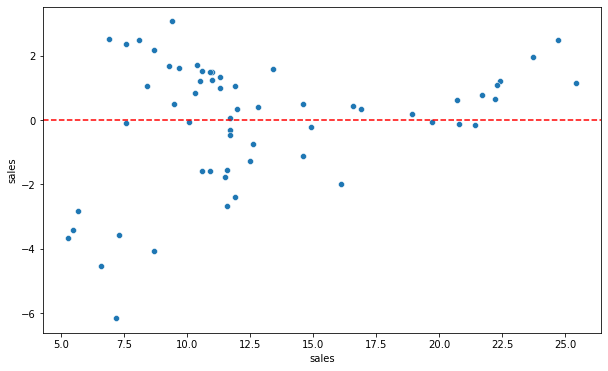

In [46]:
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.show()    

<AxesSubplot:xlabel='sales', ylabel='Density'>

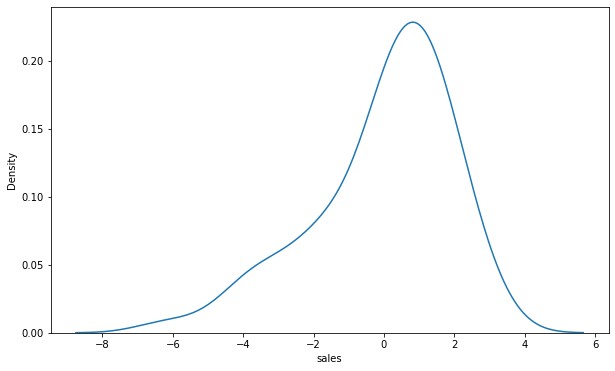

In [47]:
sns.kdeplot(residuals)

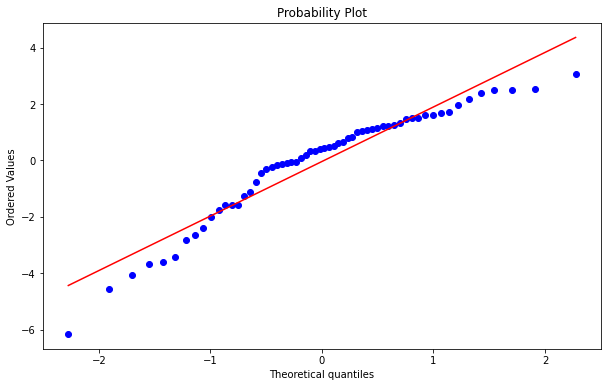

In [48]:
stats.probplot(residuals, dist = 'norm',plot = plt);

In [49]:
skew(residuals)

-0.9865673346742712

In [50]:
!pip install yellowbrick --user

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)


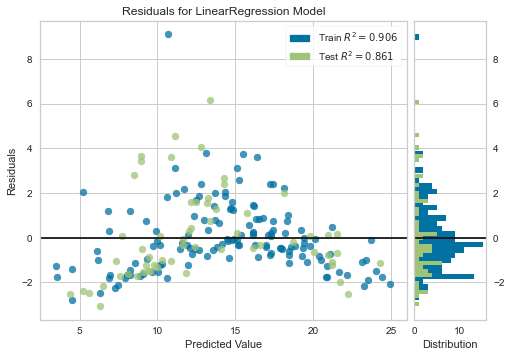

In [51]:
from yellowbrick.regressor import ResidualsPlot
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

## Prediction Error for LinearRegression

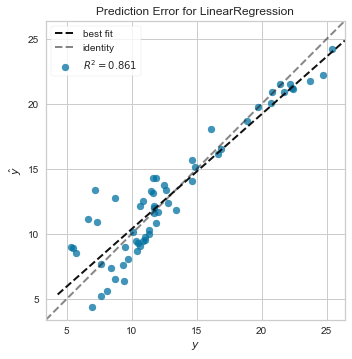

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [56]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

silik olan çizgi mkemmel sonuçlardır. Silik olmayan çizgi ise benim lineer regresyon ile aldığım best fit line dır.
Hangi modeli seçmem gerektiğine karar verdikten sonra, modeli tüm data ile eğitirim. Çünkü ne kadar fazla data ile eğitirsem o kadar daha kesin ve sağlıklı bir predict yapan algoritma oluştururum.

## Retraining Model on Full Data

eğitimimi tamamladıktan ve model validation'u geçtikten (yani modelimden emin olduktan sonra) artık son aşamada tüm datamı kullanarak fit yapıyorum. çünkü ne kadar büyük data ile fit yaparsam o kadar iyi sonuç alırım

In [53]:
final_model = LinearRegression()

In [54]:
final_model.fit(X,y)

LinearRegression()

## Coefficients

## Prediction on New Data

## Feature importance (The effect of features on the predicted label)